In [1]:
import Data.dataset as ds
import Plots.plots as pl
import Calculations.monte_carlo as mc
import Calculations.calculations as cal
import Calculations.probability as pb

In [2]:
zone1 = ds.get_out1()
zone2 = ds.get_out2()

mass = ('Mass', 'Mass [kg]')
velocity = ('Velocity', 'Velocity [m/s]')
kinetic_energy = ('Kinetic Energy', 'Kinetic Energy [kJ]')
timedelta = ('Timedelta', 'TimeDiffHours')
n_years = 900000

In [3]:
without_outliers_zone1 = ds.replace_outliers_with_median(zone1)
without_outliers_zone2 = ds.replace_outliers_with_median(zone2)

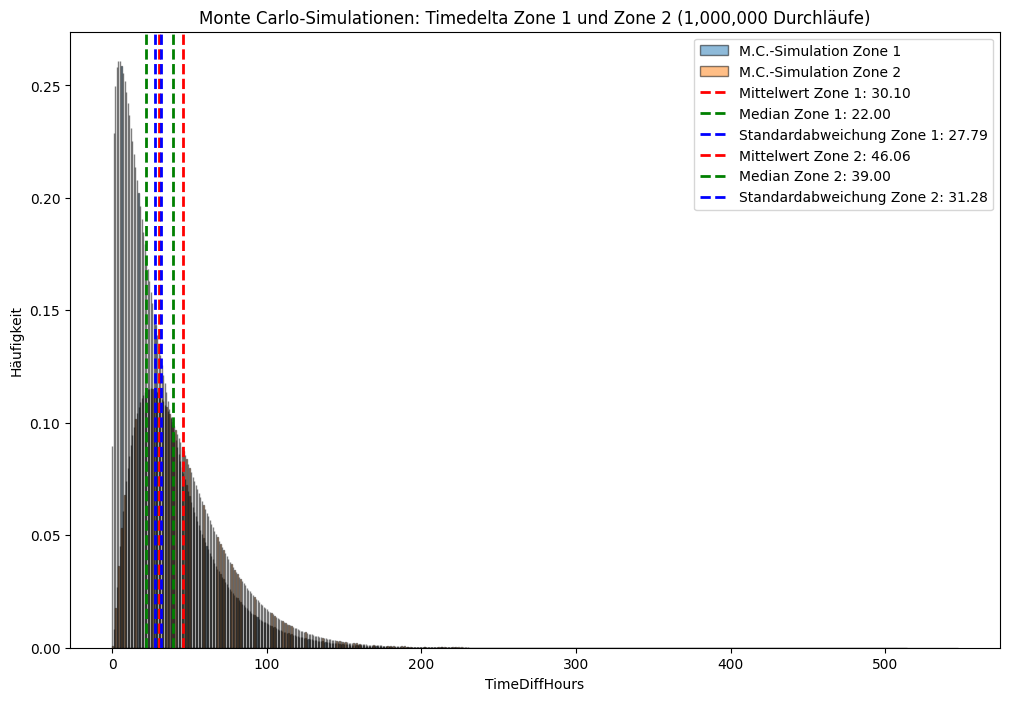

In [4]:
sim_timediff_zone1 = mc.simulate_gamma_distribution_timediff(without_outliers_zone1, n_years, timedelta)
sim_timediff_zone2 = mc.simulate_gamma_distribution_timediff(without_outliers_zone2, n_years, timedelta)

n_simulations_zone1 = len(sim_timediff_zone1)
n_simulations_zone2 = len(sim_timediff_zone2)

pl.show_simulated_data(sim_timediff_zone1, sim_timediff_zone2, timedelta)

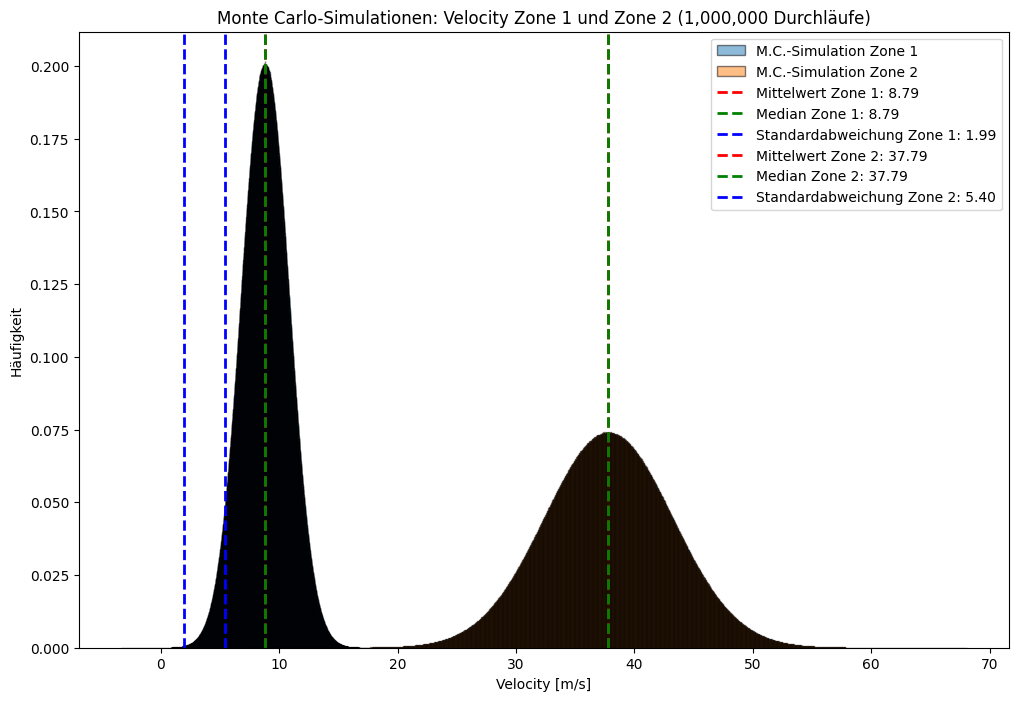

In [5]:
sim_velocity_zone1 = mc.simulate_norm_distribution(without_outliers_zone1, n_simulations_zone1, velocity)
sim_velocity_zone2 = mc.simulate_norm_distribution(without_outliers_zone2, n_simulations_zone2, velocity)

pl.show_simulated_data(sim_velocity_zone1, sim_velocity_zone2, velocity)

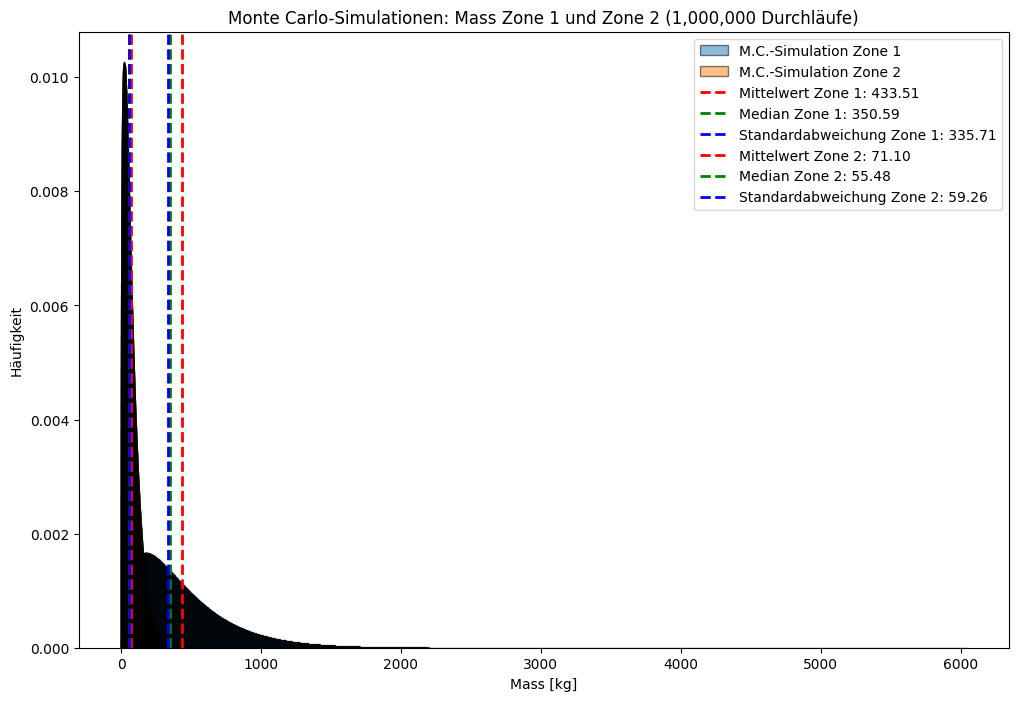

In [6]:
sim_mass_zone1 = mc.simulate_gamma_distribution(without_outliers_zone1, n_simulations_zone1, mass)
sim_mass_zone2 = mc.simulate_gamma_distribution(without_outliers_zone2, n_simulations_zone2, mass)

pl.show_simulated_data(sim_mass_zone1, sim_mass_zone2, mass)

In [7]:
merged_zone1 = ds.merge_simulated_data(sim_mass_zone1, sim_velocity_zone1, sim_timediff_zone1)
merged_zone2 = ds.merge_simulated_data(sim_mass_zone2, sim_velocity_zone2, sim_timediff_zone2)

In [8]:
sim_rocks_in_net = cal.sim_calculate_cumulative_mass_since_clearing(merged_zone1, merged_zone2)

In [9]:
net_brake_probability = pb.calculate_probability(sim_rocks_in_net)
print(net_brake_probability*100, '% Netzbruchwahrscheinlichkeit')

10317 Steinschläge
0.002382379816350729 % Netzbruchwahrscheinlichkeit


In [10]:
overall_death_probability = pb.calculate_overall_death_probability(net_brake_probability)
print(overall_death_probability*100, '% Gesamttodeswahrscheinlichkeit')

1.812895745050251e-05 % Gesamttodeswahrscheinlichkeit
